In [34]:
#!git clone https://github.com/lrburle/ML_Assignment3.git

fatal: destination path 'ML_Assignment2' already exists and is not an empty directory.


# Assignment 3 - Landon Burleson 
## Problem 1


In [1]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras
 
# adding the subfolder to the path.
# sys.path.insert(0, './ML_Assignment3')

In [2]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() 

#Splits the dataset for validation and training datasets. 
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
cnn_model1 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.summary()

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        36928     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 128)         73856     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 128)        

In [13]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model2 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.summary()

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 256)       2560      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 256)       0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 128)       295040    
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 128)       147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 128)         0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 64)          73792     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 64)         

In [14]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model3 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv8"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.summary()

#Training the network.
history3 = cnn_model2.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 256)       2560      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 256)       0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 128)       295040    
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        73792     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv6 (Conv2D)              (None, 7, 7, 64)          36928     
                                                                 
 conv7 (Conv2D)              (None, 7, 7, 128)        

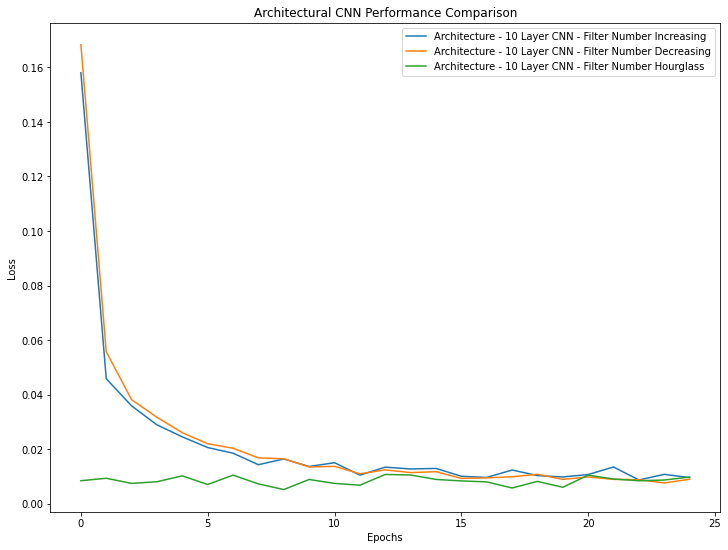

In [18]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend(['Architecture - 10 Layer CNN - Filter Number Increasing', 'Architecture - 10 Layer CNN - Filter Number Decreasing', 'Architecture - 10 Layer CNN - Filter Number Hourglass'], loc='upper right')
plt.show()

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [23]:
# Building the LeNet model in keras
lanet = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), padding='same', input_shape = [28, 28, 1], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
lanet.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
lanet.summary()

#Training the network.
history4 = lanet.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 120)         48120     
                                                                 
 flatten_14 (Flatten)        (None, 5880)            

In [ ]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history4.history['loss'])
plt.show()

***

# Problem 3

***

In [3]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])